In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

C:\Users\Ajanthan\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Sentiment Analysis On Yelp Data 

#### Name: Ajanthan Mathialagan 
#### Student Number: 500768117
#### Supervisor : Bilgehan Erdem

# Importing The Data

In [2]:
business_json_path = 'yelp_academic_dataset_business.json'
review_json_path = 'yelp_academic_dataset_review.json'  
tip_json_path = 'yelp_academic_dataset_tip.json'

In [3]:
df_b = pd.read_json(business_json_path, lines = True)

In [4]:
df_t = pd.read_json(tip_json_path, lines = True)

### Dataframe of Business.json

In [5]:
df_b.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


### Dataframe of tips.json

In [6]:
df_t.head()

,user_id,business_id,text,date,compliment_count
0,WCjg0jdHXMlwbqS9tZUx8Q,ENwBByjpoa5Gg7tKgxqwLg,Carne asada chips...,2011-07-22 19:07:35,0
1,42-Z02y9bABShAGZhuSzrQ,jKO4Og6ucdX2-YCTKQVYjg,Best happy hour from 3pm to 6pm! $1 off martin...,2014-09-10 07:33:29,0
2,5u7E3LYp_3eB8dLuUBazXQ,9Bto7mky640ocgezVKSfVg,"Nice people, skilled staff, clean location - b...",2013-12-13 23:23:41,0
3,wDWoMG5N9oI4DJ-p7z8EBg,XWFjKtRGZ9khRGtGg2ZvaA,"1/2-price bowling & the ""Very"" Old Fashion are...",2017-07-11 23:07:16,0
4,JmuFlorjjRshHTKzTwNtgg,mkrx0VhSMU3p3uhyJGCoWA,"Solid gold's. Great sauna. Great staff, too. E...",2016-11-30 08:46:36,0


### Creating The Main Dataframe

Ill combine both the business data set and the tips dataset using the businesses_id provided in both of the datasets.

In [7]:
df_b.set_index('business_id', inplace=True)

In [8]:
df_t.set_index('business_id', inplace = True)

### Dataframe of Business.json indexed on business_ids

In [9]:
df_b.head()

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
business_id,,,,,,,,,,,,,
6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


### Dataframe of tips.json indexed on business_ids

In [10]:
df_t.head()

,user_id,text,date,compliment_count
business_id,,,,
ENwBByjpoa5Gg7tKgxqwLg,WCjg0jdHXMlwbqS9tZUx8Q,Carne asada chips...,2011-07-22 19:07:35,0
jKO4Og6ucdX2-YCTKQVYjg,42-Z02y9bABShAGZhuSzrQ,Best happy hour from 3pm to 6pm! $1 off martin...,2014-09-10 07:33:29,0
9Bto7mky640ocgezVKSfVg,5u7E3LYp_3eB8dLuUBazXQ,"Nice people, skilled staff, clean location - b...",2013-12-13 23:23:41,0
XWFjKtRGZ9khRGtGg2ZvaA,wDWoMG5N9oI4DJ-p7z8EBg,"1/2-price bowling & the ""Very"" Old Fashion are...",2017-07-11 23:07:16,0
mkrx0VhSMU3p3uhyJGCoWA,JmuFlorjjRshHTKzTwNtgg,"Solid gold's. Great sauna. Great staff, too. E...",2016-11-30 08:46:36,0


# Merge The dataframes based on business_id 

### Tips Dataframe

In [11]:
# tips data
df_tip_b = pd.merge(df_b, df_t, left_on='business_id', right_on='business_id', how='left')
df_tip2 = df_tip_b.copy()
df_tip_b.head()

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,text,date,compliment_count
business_id,,,,,,,,,,,,,,,,,
6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",bgdTaNn0sGiUfIRrH5GEjg,Good beers. Bad bartender. Stay away from Brian.,2019-06-07 22:24:44,0.0
6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",nzj6O3Z9H-rTgucdvblOUA,I enjoy this location. Great beers. Great serv...,2019-03-06 22:53:59,0.0
6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",XyVyTIkPm9Nqz5VZ9nYX9A,Live music every week! Beer menus not yet prin...,2017-09-12 01:40:51,0.0
6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",Mp27LHWQy_RlbU56HJ5eHg,Good food. Good crowd. The ranch taste very si...,2017-10-14 02:36:02,0.0
6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",XyVyTIkPm9Nqz5VZ9nYX9A,The newest Oskar Blues opens this coming Monda...,2017-09-09 04:42:34,0.0


# Cleaning the Data 

Cleaning the Data involves filtering out the unwanted information and relabeling columns if necessary and changing columns to there appropriate data types if required.

In [12]:
#drop unwanted columns that we will not use for this analysis
df_tip_b = df_tip_b.drop(['user_id', 'is_open', 'hours','date','latitude','longitude'], axis = 1)

### Frequency of Stars given to the restuarant

<AxesSubplot:ylabel='Frequency'>

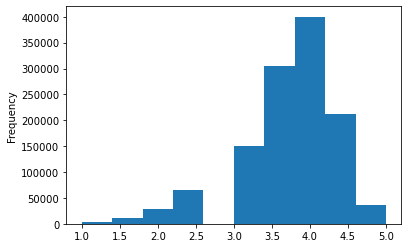

In [13]:
df_tip_b['stars'].plot(kind='hist')

we can see that based on the stars given the data is skewed slightly to the right. For the tips data 

## Hypothesis Testing 5 star businesses vs 2 star and lower businesses

We will be looking into the tips of 5 stared business and compare them to the tips to the 2 stared businesses and lower and see what the different types of recommendations given to these businesses based on the users tips. 

In [14]:
#looking at data of business where text for tip is not missing and reviews is not missing 
#df = df[df['text'].notna() & df['review'].notna()]
df_tip_cleaned = df_tip_b[df_tip_b['text'].notna()]

In [15]:
df_tip_cleaned['city'].value_counts()

Austin         203535
Portland       175819
Atlanta        117023
Orlando        105974
Vancouver       80770
                ...  
Newton MA           1
Springfield         1
HINGHAM             1
Grove city          1
Rockport            1
Name: city, Length: 647, dtype: int64

We can see that Austin has appeared the most so we will look into the business in Austin Texas

### Dataframe of businesses is Austin

In [16]:
df_austin = df_tip_cleaned[df_tip_cleaned['city'] == 'Austin']

In [17]:
df_austin.head()

,name,address,city,state,postal_code,stars,review_count,attributes,categories,text,compliment_count
business_id,,,,,,,,,,,
N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,"7801 N Lamar Blvd, Ste A140",Austin,TX,78752,5.0,30,"{'RestaurantsPriceRange2': '1', 'ByAppointment...","Shopping, Jewelry Repair, Appraisal Services, ...",Excellent customer service and their work is i...,0.0
nTIhpR7MhsALPwg_Hh14EA,DoubleTree by Hilton Hotel Austin,6505 N Interstate 35,Austin,TX,78752,3.0,139,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","Hotels, Hotels & Travel, Event Planning & Serv...",Very large rooms! Wow. True what they say abou...,0.0
nTIhpR7MhsALPwg_Hh14EA,DoubleTree by Hilton Hotel Austin,6505 N Interstate 35,Austin,TX,78752,3.0,139,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","Hotels, Hotels & Travel, Event Planning & Serv...",Overall not a bad hotel. Wifi was really bad....,0.0
nTIhpR7MhsALPwg_Hh14EA,DoubleTree by Hilton Hotel Austin,6505 N Interstate 35,Austin,TX,78752,3.0,139,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","Hotels, Hotels & Travel, Event Planning & Serv...",This place looks and feels old. Very dated. An...,0.0
nTIhpR7MhsALPwg_Hh14EA,DoubleTree by Hilton Hotel Austin,6505 N Interstate 35,Austin,TX,78752,3.0,139,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","Hotels, Hotels & Travel, Event Planning & Serv...",Workshop time!,0.0


### Frequency Graph of Ratings In Austin

<AxesSubplot:ylabel='Frequency'>

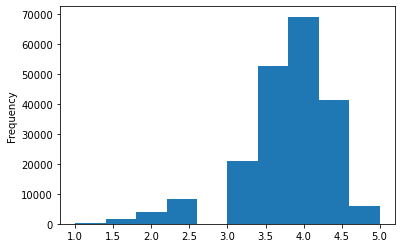

In [18]:
df_austin['stars'].plot(kind='hist')

Since the distribution is normal and holds a similar resemblance to the frequency graph based on the overall data we can use the same hypothesis comparing 5 stared businesses and 2 stared businesses 

### 5 Stared Businesses in Austin

In [19]:
df_austin_5_stars = df_austin[df_austin['stars'] == 5.0]

In [20]:
df_austin_5_stars.head()

,name,address,city,state,postal_code,stars,review_count,attributes,categories,text,compliment_count
business_id,,,,,,,,,,,
N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,"7801 N Lamar Blvd, Ste A140",Austin,TX,78752,5.0,30,"{'RestaurantsPriceRange2': '1', 'ByAppointment...","Shopping, Jewelry Repair, Appraisal Services, ...",Excellent customer service and their work is i...,0.0
NVfOn7TdnHbaGH97CVB_Qg,McKinley Chiropractic,"5625 Eiger Rd, Ste 160",Austin,TX,78735,5.0,5,"{'BusinessAcceptsCreditCards': 'True', 'Accept...","Chiropractors, Health & Medical",Yea! Better!,0.0
NVfOn7TdnHbaGH97CVB_Qg,McKinley Chiropractic,"5625 Eiger Rd, Ste 160",Austin,TX,78735,5.0,5,"{'BusinessAcceptsCreditCards': 'True', 'Accept...","Chiropractors, Health & Medical",Dropped by while waiting for other appointment.,0.0
NVfOn7TdnHbaGH97CVB_Qg,McKinley Chiropractic,"5625 Eiger Rd, Ste 160",Austin,TX,78735,5.0,5,"{'BusinessAcceptsCreditCards': 'True', 'Accept...","Chiropractors, Health & Medical",Great staff I must say.,0.0
NVfOn7TdnHbaGH97CVB_Qg,McKinley Chiropractic,"5625 Eiger Rd, Ste 160",Austin,TX,78735,5.0,5,"{'BusinessAcceptsCreditCards': 'True', 'Accept...","Chiropractors, Health & Medical",Appointment made for tomorrow no worries,0.0


### 2 Stared Businesses in Austin

In [21]:
df_austin_2_stars = df_austin[df_austin['stars'] <= 2]

In [22]:
df_austin_2_stars.head()

,name,address,city,state,postal_code,stars,review_count,attributes,categories,text,compliment_count
business_id,,,,,,,,,,,
bRsDZ44CD3uhGnRY3NeQhQ,Wendy's,6247 Mcneil Drive,Austin,TX,78729,2.0,46,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Fast Food, Restaurants, Burgers",Not Worth the stress!,0.0
bRsDZ44CD3uhGnRY3NeQhQ,Wendy's,6247 Mcneil Drive,Austin,TX,78729,2.0,46,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Fast Food, Restaurants, Burgers",Open super late,0.0
bRsDZ44CD3uhGnRY3NeQhQ,Wendy's,6247 Mcneil Drive,Austin,TX,78729,2.0,46,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Fast Food, Restaurants, Burgers","Good food, ghetto crew at night",0.0
bRsDZ44CD3uhGnRY3NeQhQ,Wendy's,6247 Mcneil Drive,Austin,TX,78729,2.0,46,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Fast Food, Restaurants, Burgers",Gotta have it every once in a while! Right?! =),0.0
bRsDZ44CD3uhGnRY3NeQhQ,Wendy's,6247 Mcneil Drive,Austin,TX,78729,2.0,46,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Fast Food, Restaurants, Burgers","So bad I have no words, I'll rather stay hungr...",0.0


### Looking into Missing Data

Since we are doing a text analysis we have to see if there is any missing text data in the dataframes. 

In [23]:
#looking if there still included any null values in the text column for the dataframe
df_austin_5_stars.isnull().sum(axis=0)

name                  0
address               0
city                  0
state                 0
postal_code           0
stars                 0
review_count          0
attributes          273
categories            3
text                  0
compliment_count      0
dtype: int64

In [24]:
df_austin_2_stars.isnull().sum(axis=0)

name                  0
address               0
city                  0
state                 0
postal_code           0
stars                 0
review_count          0
attributes          561
categories            8
text                  0
compliment_count      0
dtype: int64

<AxesSubplot:ylabel='business_id'>

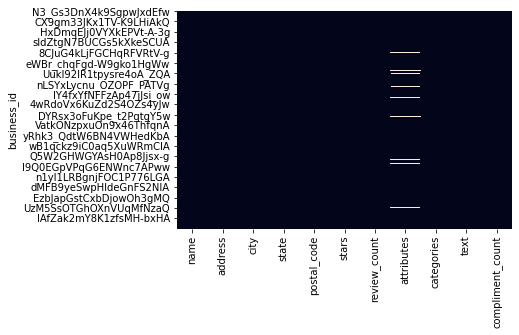

In [25]:
#heat map of the null values
sns.heatmap(df_austin_5_stars.isnull(),cbar= False)

<AxesSubplot:ylabel='business_id'>

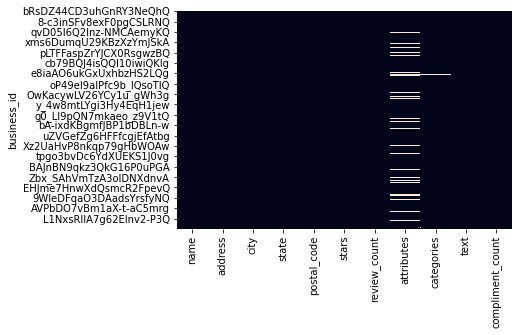

In [26]:
sns.heatmap(df_austin_2_stars.isnull(),cbar= False)

based on the missing information neither aare related to text data. Therefore we can say that the text data will be usable for further analysis.

### Data Types

making sure the data we are working with has the right data types assigned to them before performing any further analysis

In [27]:
#since the text data is object type we must change it to string type to enable us to do further analysis on the column
df_austin_5_stars.dtypes

name                 object
address              object
city                 object
state                object
postal_code          object
stars               float64
review_count          int64
attributes           object
categories           object
text                 object
compliment_count    float64
dtype: object

In [28]:
df_austin_2_stars['text'].astype(str)

business_id
bRsDZ44CD3uhGnRY3NeQhQ                                Not Worth the stress!
bRsDZ44CD3uhGnRY3NeQhQ                                      Open super late
bRsDZ44CD3uhGnRY3NeQhQ                      Good food, ghetto crew at night
bRsDZ44CD3uhGnRY3NeQhQ     Gotta have it every once in a while!  Right?! =)
bRsDZ44CD3uhGnRY3NeQhQ    So bad I have no words, I'll rather stay hungr...
                                                ...                        
sexYEzEBgE2sxgI5InSaDQ                            Now with 88% realer beef!
sexYEzEBgE2sxgI5InSaDQ    Douche bags. The chic at the drive thru was ru...
sexYEzEBgE2sxgI5InSaDQ                                                Gross
sexYEzEBgE2sxgI5InSaDQ               Manager threw my debit card in my face
sexYEzEBgE2sxgI5InSaDQ                              It's freaking TacoBell!
Name: text, Length: 5514, dtype: object

In [29]:
df_austin_5_stars['text'].astype(str)

business_id
N3_Gs3DnX4k9SgpwJxdEfw    Excellent customer service and their work is i...
NVfOn7TdnHbaGH97CVB_Qg                                         Yea! Better!
NVfOn7TdnHbaGH97CVB_Qg      Dropped by while waiting for other appointment.
NVfOn7TdnHbaGH97CVB_Qg                              Great staff I must say.
NVfOn7TdnHbaGH97CVB_Qg             Appointment made for tomorrow no worries
                                                ...                        
WGNFqCdsBMrSuU-hYukdKg    I would highly recommend this vet office.  Dr....
w4fNDwn6Oke2FCRihUScpQ                     Best doula practice in the area!
nFgFA7txUzi8GyJVpIU6tg                         The owner is a notary public
S7HkN28qoPP9zflls1tolA    Very knowledgeable. Super professional. Good m...
TLg7py9H1W0E-F8BAn5OJQ                   No problem totally agree....thanks
Name: text, Length: 5937, dtype: object

### Regular Expressions

Next, let’s perform a simple preprocessing on the content on the text column to make them more amenable for analysis since it doesn't have any missing data in it. Thus it will provide us with reliable results.
To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

In [30]:
import re

In [31]:
df_austin_2_stars['text'] = \
df_austin_2_stars['text'].map(lambda x: x.lower())

C:\Users\Ajanthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Explanatory Analysis: 5 Star Rated Business in Austin vs 2 Star Rated Business in Austin

To verify whether the preprocessing steps must be taken further, we’ll make a word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

In [32]:
#!pip install wordcloud

In [33]:
from wordcloud import WordCloud

In [34]:
long_string = ','.join(list(df_austin_5_stars['text'].values))
long_string2 = ','.join(list(df_austin_2_stars['text'].values))

In [35]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [36]:
wordcloud.generate(long_string)

### Word Cloud Of 5 Star Rated Businesses In Austin

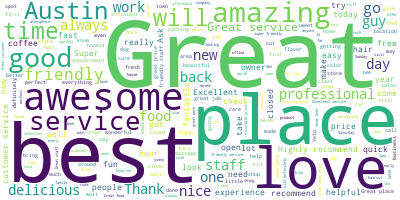

In [37]:
wordcloud.to_image()

The bigger the word in the wordcloud the more times it occurs in the text. Since we are viewing all the 5 star businesses in Austin we can see that the most popular words are great, best, place, love, awesome, etc. Which we can say are positive to see when looking at 5 star reviewed businesses

### Word Cloud Of 2 Star and lower Rated Businesses In Austin

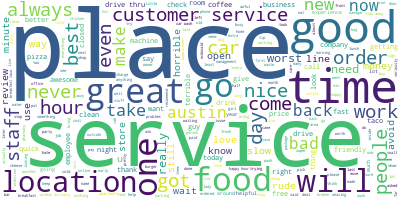

In [38]:
wordcloud.generate(long_string2)
wordcloud.to_image()

We can see that the 2 stared rated business has less positive words compared to the 5 star rated businesses in austin. We can also see that most of the tips are targeted towards the place, service, food, time and location. 

In [39]:
import gensim

In [40]:
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ajanthan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [41]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [42]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data2 = df_austin_5_stars.text.values.tolist()
data3 = df_austin_2_stars.text.values.tolist()
data_words = list(sent_to_words(data2))
data_words2 = list(sent_to_words(data3))
# remove stop words
data_words = remove_stopwords(data_words)
data_words2 = remove_stopwords(data_words2)
print('5 star businesses data words: ',data_words[:1][0][:30])
print('2 stared businesses data words: ',data_words2[:1][0][:30])

5 star businesses data words:  ['excellent', 'customer', 'service', 'work', 'incomparable', 'friendly', 'quick']
2 stared businesses data words:  ['worth', 'stress']


In [43]:
import gensim.corpora as corpora

In [44]:
#Create Dicitionary 
id2word = corpora.Dictionary(data_words)
id2word2 = corpora.Dictionary(data_words2)
#Create Corpus
texts = data_words
texts2 = data_words2
#Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
corpus2 = [id2word2.doc2bow(text) for text in texts2]
print('corpus of words for 5 stared businesses in austin',corpus[:1][0][:30])
print('corpus of words for 2 stared businesses in austin', corpus2[:1][0][:30])

corpus of words for 5 stared businesses in austin [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]
corpus of words for 2 stared businesses in austin [(0, 1), (1, 1)]


## Creating a LDA Model

We will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

### LDA model: 5 star reviewed Businesses

In [45]:
from pprint import pprint

In [46]:
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"great" + 0.015*"best" + 0.011*"place" + 0.011*"good" + '
  '0.009*"service" + 0.008*"staff" + 0.008*"love" + 0.008*"go" + 0.007*"get" + '
  '0.006*"austin"'),
 (1,
  '0.047*"great" + 0.026*"service" + 0.014*"love" + 0.013*"place" + '
  '0.013*"friendly" + 0.010*"awesome" + 0.009*"delicious" + 0.007*"food" + '
  '0.006*"fast" + 0.006*"best"'),
 (2,
  '0.025*"great" + 0.011*"good" + 0.011*"service" + 0.010*"awesome" + '
  '0.009*"get" + 0.009*"time" + 0.008*"love" + 0.008*"people" + 0.006*"best" + '
  '0.006*"amazing"'),
 (3,
  '0.021*"best" + 0.017*"amazing" + 0.013*"great" + 0.011*"austin" + '
  '0.010*"place" + 0.007*"food" + 0.006*"ever" + 0.006*"service" + '
  '0.006*"coffee" + 0.006*"tacos"'),
 (4,
  '0.016*"great" + 0.011*"recommend" + 0.010*"place" + 0.009*"highly" + '
  '0.008*"get" + 0.007*"always" + 0.007*"best" + 0.007*"friendly" + '
  '0.006*"back" + 0.006*"professional"')]


### LDA model: 2 star reviewed Businesses

In [47]:
# number of topics
num_topics = 5
# Build LDA model
lda_model2 = gensim.models.LdaMulticore(corpus=corpus2,
                                       id2word=id2word2,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model2.print_topics())
doc_lda2 = lda_model2[corpus2]

[(0,
  '0.012*"service" + 0.010*"time" + 0.007*"go" + 0.007*"place" + 0.007*"car" + '
  '0.006*"customer" + 0.006*"horrible" + 0.006*"good" + 0.005*"bad" + '
  '0.005*"drive"'),
 (1,
  '0.011*"service" + 0.009*"great" + 0.008*"get" + 0.006*"slow" + 0.006*"good" '
  '+ 0.006*"place" + 0.006*"food" + 0.006*"go" + 0.006*"time" + 0.005*"like"'),
 (2,
  '0.011*"place" + 0.010*"service" + 0.007*"breakfast" + 0.007*"time" + '
  '0.007*"like" + 0.006*"car" + 0.006*"get" + 0.006*"great" + 0.005*"good" + '
  '0.005*"even"'),
 (3,
  '0.011*"place" + 0.011*"service" + 0.011*"great" + 0.010*"one" + '
  '0.009*"good" + 0.008*"location" + 0.008*"go" + 0.008*"food" + 0.007*"get" + '
  '0.007*"ever"'),
 (4,
  '0.011*"service" + 0.009*"food" + 0.008*"get" + 0.007*"good" + 0.006*"staff" '
  '+ 0.005*"worst" + 0.005*"time" + 0.005*"best" + 0.005*"gas" + '
  '0.005*"order"')]


# Evaluating LDA Model (Model Performance)

In [48]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score for 5 star businesses: ', coherence_lda)


Coherence Score for 5 star businesses:  0.19047038466370472


In [49]:
coherence_model_lda2 = CoherenceModel(model=lda_model2, texts=texts2, dictionary=id2word2, coherence='c_v')

In [50]:
coherence_lda2 = coherence_model_lda2.get_coherence()

In [51]:
print('\nCoherence Score for 2 star and below businesses: ', coherence_lda2)


Coherence Score for 2 star and below businesses:  0.2111421991758206


In [55]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

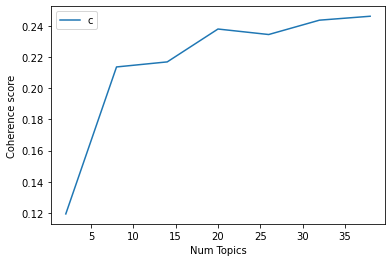

In [56]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

The above plot shows that coherence score increases with the number of topics, with a decline. Now, choosing the number of topics still depends on your requirement because topics more than 5 have good coherence scores but may have repeated keywords in the topic. Topic coherence gives you a good picture so that you can take better decision.

In our case the optimal amount of topics we will choose is 10 since the coherance score raised drastically at 10 topics choosing more topics has a higher chance of repeating keywords in the topic which we dont want 

# Revaluating Model Based On Model Performance Metric

### LDA Model For 5 Stared Businesses In Austin

In [57]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.017*"great" + 0.014*"best" + 0.012*"service" + 0.009*"time" + '
  '0.009*"amazing" + 0.008*"recommend" + 0.007*"nice" + 0.007*"parking" + '
  '0.007*"wonderful" + 0.006*"professional"'),
 (1,
  '0.018*"service" + 0.014*"great" + 0.014*"place" + 0.013*"best" + '
  '0.010*"time" + 0.009*"good" + 0.008*"amazing" + 0.007*"back" + '
  '0.007*"austin" + 0.006*"go"'),
 (2,
  '0.026*"great" + 0.014*"place" + 0.011*"friendly" + 0.010*"new" + '
  '0.009*"amazing" + 0.009*"staff" + 0.008*"nice" + 0.007*"good" + '
  '0.007*"best" + 0.006*"get"'),
 (3,
  '0.028*"great" + 0.011*"best" + 0.010*"delicious" + 0.009*"austin" + '
  '0.008*"nice" + 0.008*"service" + 0.007*"massage" + 0.007*"good" + '
  '0.006*"staff" + 0.006*"place"'),
 (4,
  '0.027*"great" + 0.015*"best" + 0.013*"good" + 0.011*"job" + 0.010*"service" '
  '+ 0.009*"place" + 0.009*"friendly" + 0.008*"back" + 0.007*"definitely" + '
  '0.007*"recommend"'),
 (5,
  '0.021*"love" + 0.018*"best" + 0.016*"service" + 0.012*"great" + '
  

### LDA Model For 2 Star And Less Business In Austin

In [59]:
# number of topics
num_topics = 10
# Build LDA model
lda_model2 = gensim.models.LdaMulticore(corpus=corpus2,
                                       id2word=id2word2,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model2.print_topics())
doc_lda2 = lda_model2[corpus2]

[(0,
  '0.013*"service" + 0.011*"food" + 0.008*"place" + 0.007*"great" + '
  '0.007*"money" + 0.006*"good" + 0.006*"like" + 0.005*"people" + 0.005*"get" '
  '+ 0.005*"fast"'),
 (1,
  '0.016*"service" + 0.016*"time" + 0.010*"place" + 0.009*"good" + '
  '0.009*"food" + 0.007*"great" + 0.007*"never" + 0.007*"coffee" + '
  '0.006*"really" + 0.006*"get"'),
 (2,
  '0.011*"get" + 0.008*"service" + 0.008*"place" + 0.007*"never" + '
  '0.007*"terrible" + 0.007*"ever" + 0.006*"like" + 0.005*"worst" + '
  '0.005*"people" + 0.004*"wait"'),
 (3,
  '0.015*"get" + 0.007*"never" + 0.007*"place" + 0.007*"go" + 0.006*"like" + '
  '0.006*"avoid" + 0.005*"food" + 0.005*"know" + 0.005*"nice" + '
  '0.004*"business"'),
 (4,
  '0.017*"service" + 0.009*"go" + 0.009*"place" + 0.008*"customer" + '
  '0.008*"one" + 0.006*"great" + 0.006*"even" + 0.005*"good" + 0.005*"get" + '
  '0.005*"time"'),
 (5,
  '0.012*"good" + 0.010*"get" + 0.009*"slow" + 0.009*"service" + 0.008*"time" '
  '+ 0.006*"go" + 0.006*"come" + 0

## Analyzing LDA model Results

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The table below shows the dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

This way, you will know which document belongs predominantly to which topic.

In [60]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=df_austin_5_stars):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)



In [61]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

### Table of Dominant topics and words: 5 stared rated businesses in Austin

In [62]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.8875,"great, best, service, time, amazing, recommend...","[excellent, customer, service, work, incompara..."
1,1,6.0,0.6998,"great, service, friendly, get, awesome, love, ...","[yea, better]"
2,2,2.0,0.7749,"great, place, friendly, new, amazing, staff, n...","[dropped, waiting, appointment]"
3,3,6.0,0.8199,"great, service, friendly, get, awesome, love, ...","[great, staff, must, say]"
4,4,9.0,0.8199,"great, amazing, get, staff, experience, closed...","[appointment, made, tomorrow, worries]"
5,5,3.0,0.8874,"great, best, delicious, austin, nice, service,...","[tried, carne, asada, torta, much, better, chi..."
6,6,6.0,0.8713,"great, service, friendly, get, awesome, love, ...","[fantastic, food, truck, front, gulf, station]"
7,7,6.0,0.9181,"great, service, friendly, get, awesome, love, ...","[super, fast, friendly, come, passport, took, ..."
8,8,6.0,0.8714,"great, service, friendly, get, awesome, love, ...","[great, customer, service, super, fast, thank]"
9,9,5.0,0.9357,"love, best, service, great, good, place, food,...","[super, easy, get, passport, minutes, parking,..."


When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

I will plot the word counts and the weights of each keyword in the same chart.

We want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important.

In [63]:
def format_topics_sentences2(ldamodel=None, corpus=corpus2, texts=df_austin_2_stars):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [64]:
df_topic_sents_keywords = format_topics_sentences2(ldamodel=lda_model2, corpus=corpus2, texts=texts2)

### Table of Dominant topics and words: 2 stared and lower rated businesses in Austin

In [65]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.6998,"place, service, always, food, get, great, horr...","[worth, stress]"
1,1,0.0,0.7749,"service, food, place, great, money, good, like...","[open, super, late]"
2,2,8.0,0.8500,"place, service, always, food, get, great, horr...","[good, food, ghetto, crew, night]"
3,3,0.0,0.7749,"service, food, place, great, money, good, like...","[gotta, every, right]"
4,4,9.0,0.6153,"great, service, good, back, car, time, go, eve...","[bad, words, rather, stay, hungry, go, wendy]"
5,5,9.0,0.6998,"great, service, good, back, car, time, go, eve...","[sinful, good]"
6,6,7.0,0.6999,"service, one, customer, staff, food, good, loc...","[bad, management]"
7,7,3.0,0.5499,"get, never, place, go, like, avoid, food, know...",[rude]
8,8,2.0,0.8500,"get, service, place, never, terrible, ever, li...","[terrible, never, get, order, right]"
9,9,4.0,0.9357,"service, go, place, customer, one, great, even...","[beautiful, live, hidden, among, trees, along,..."


## Visualizing LDA Model

### 5 Stared Rated Businesses In Austin

In [66]:
from collections import Counter

In [67]:
import matplotlib.colors as mcolors

In [68]:
topics = lda_model.show_topics(formatted=False)

In [69]:
data_flat = [w for w_list in data_words for w in w_list]

In [70]:
counter = Counter(data_flat)

In [71]:
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

C:\Users\Ajanthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
C:\Users\Ajanthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
C:\Users\Ajanthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
C:\Users\Ajanthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
C:\Users\Ajanthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
C:\Users\Ajanthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocato

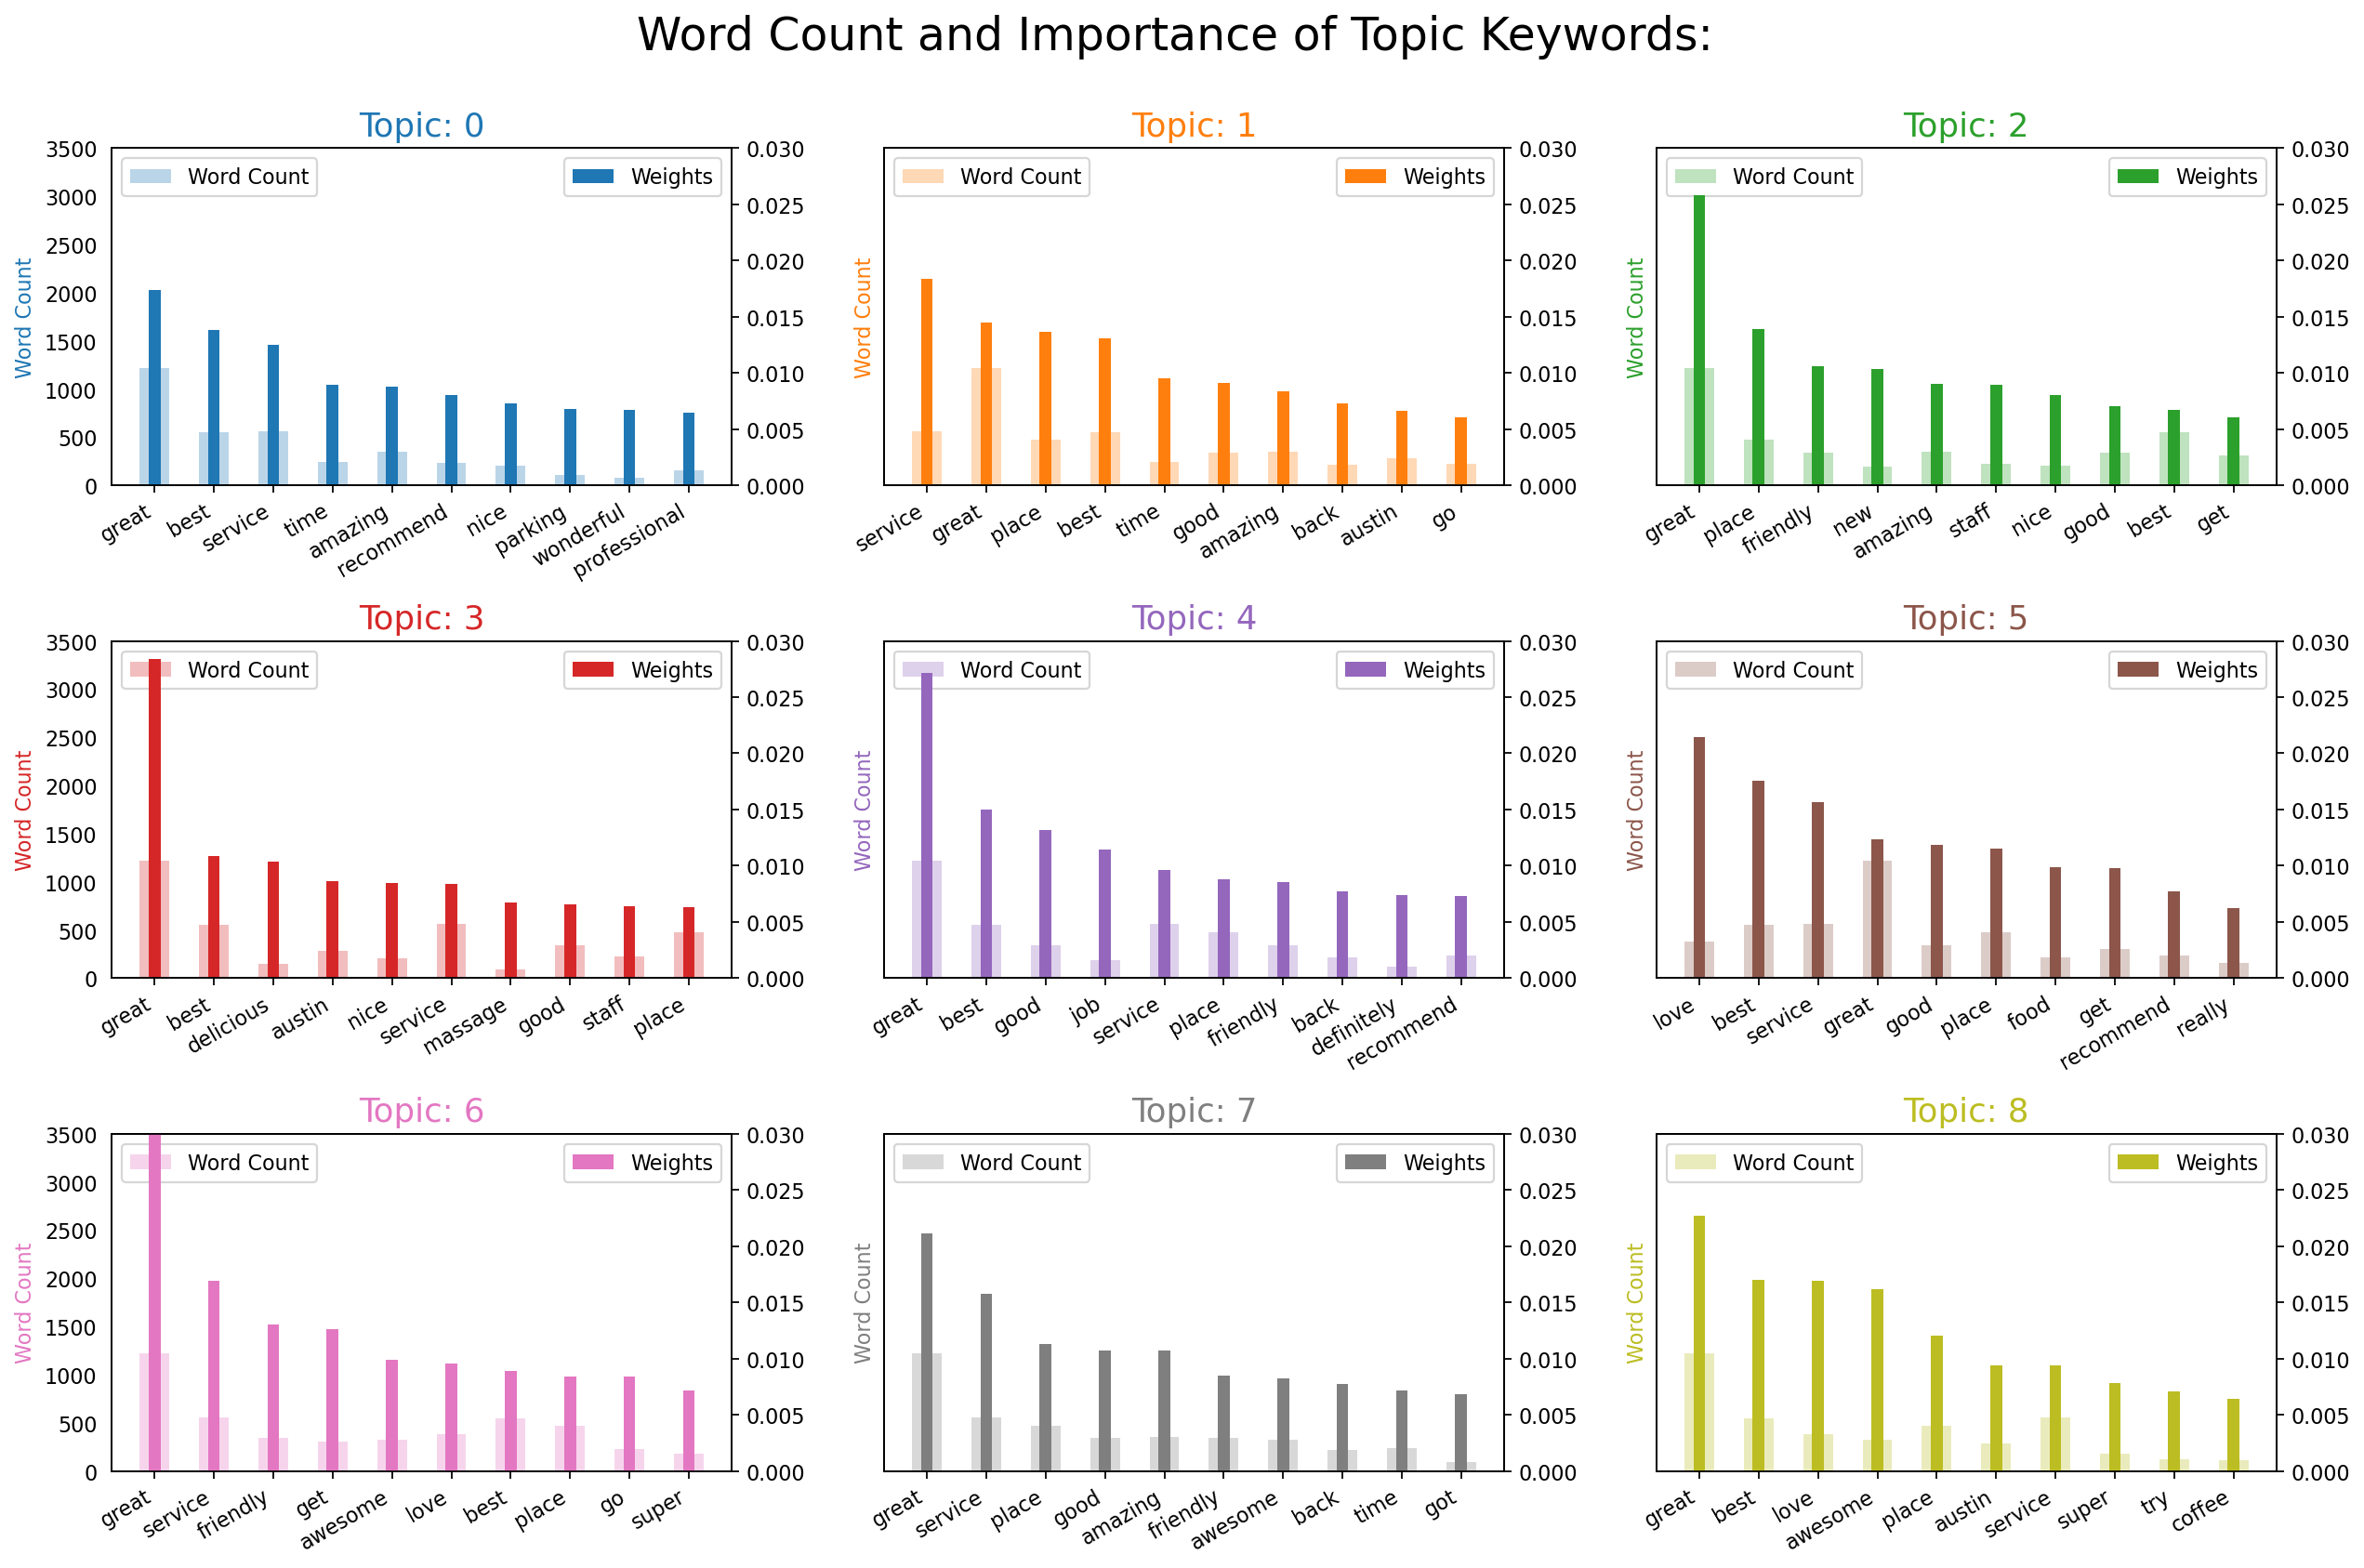

In [72]:
#Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 3, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords: ', fontsize=22, y=1.05)    
plt.show()

Based on this visualization we can see the most common words provided by the customers tips based on the topic that were assigned by the LDA algorithm. For instance in Topic 0 we see key words such as best, great, amazing, awesome,  etc. These are all positive words that customers have shown on the tips for the 5 star rated businesses. We can also see that the weight of the words are higher than the word count, meaning that there is more relevance to those words.

### 2 Stared and Lower Rated Businesses In Austin

In [73]:
topics2 = lda_model2.show_topics(formatted=False)

In [74]:
data_flat2 = [w for w_list in data_words2 for w in w_list]

In [75]:
counter = Counter(data_flat2)

In [76]:
out = []
for i, topic in topics2:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_2 = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

C:\Users\Ajanthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
C:\Users\Ajanthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
C:\Users\Ajanthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
C:\Users\Ajanthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
C:\Users\Ajanthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
C:\Users\Ajanthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocato

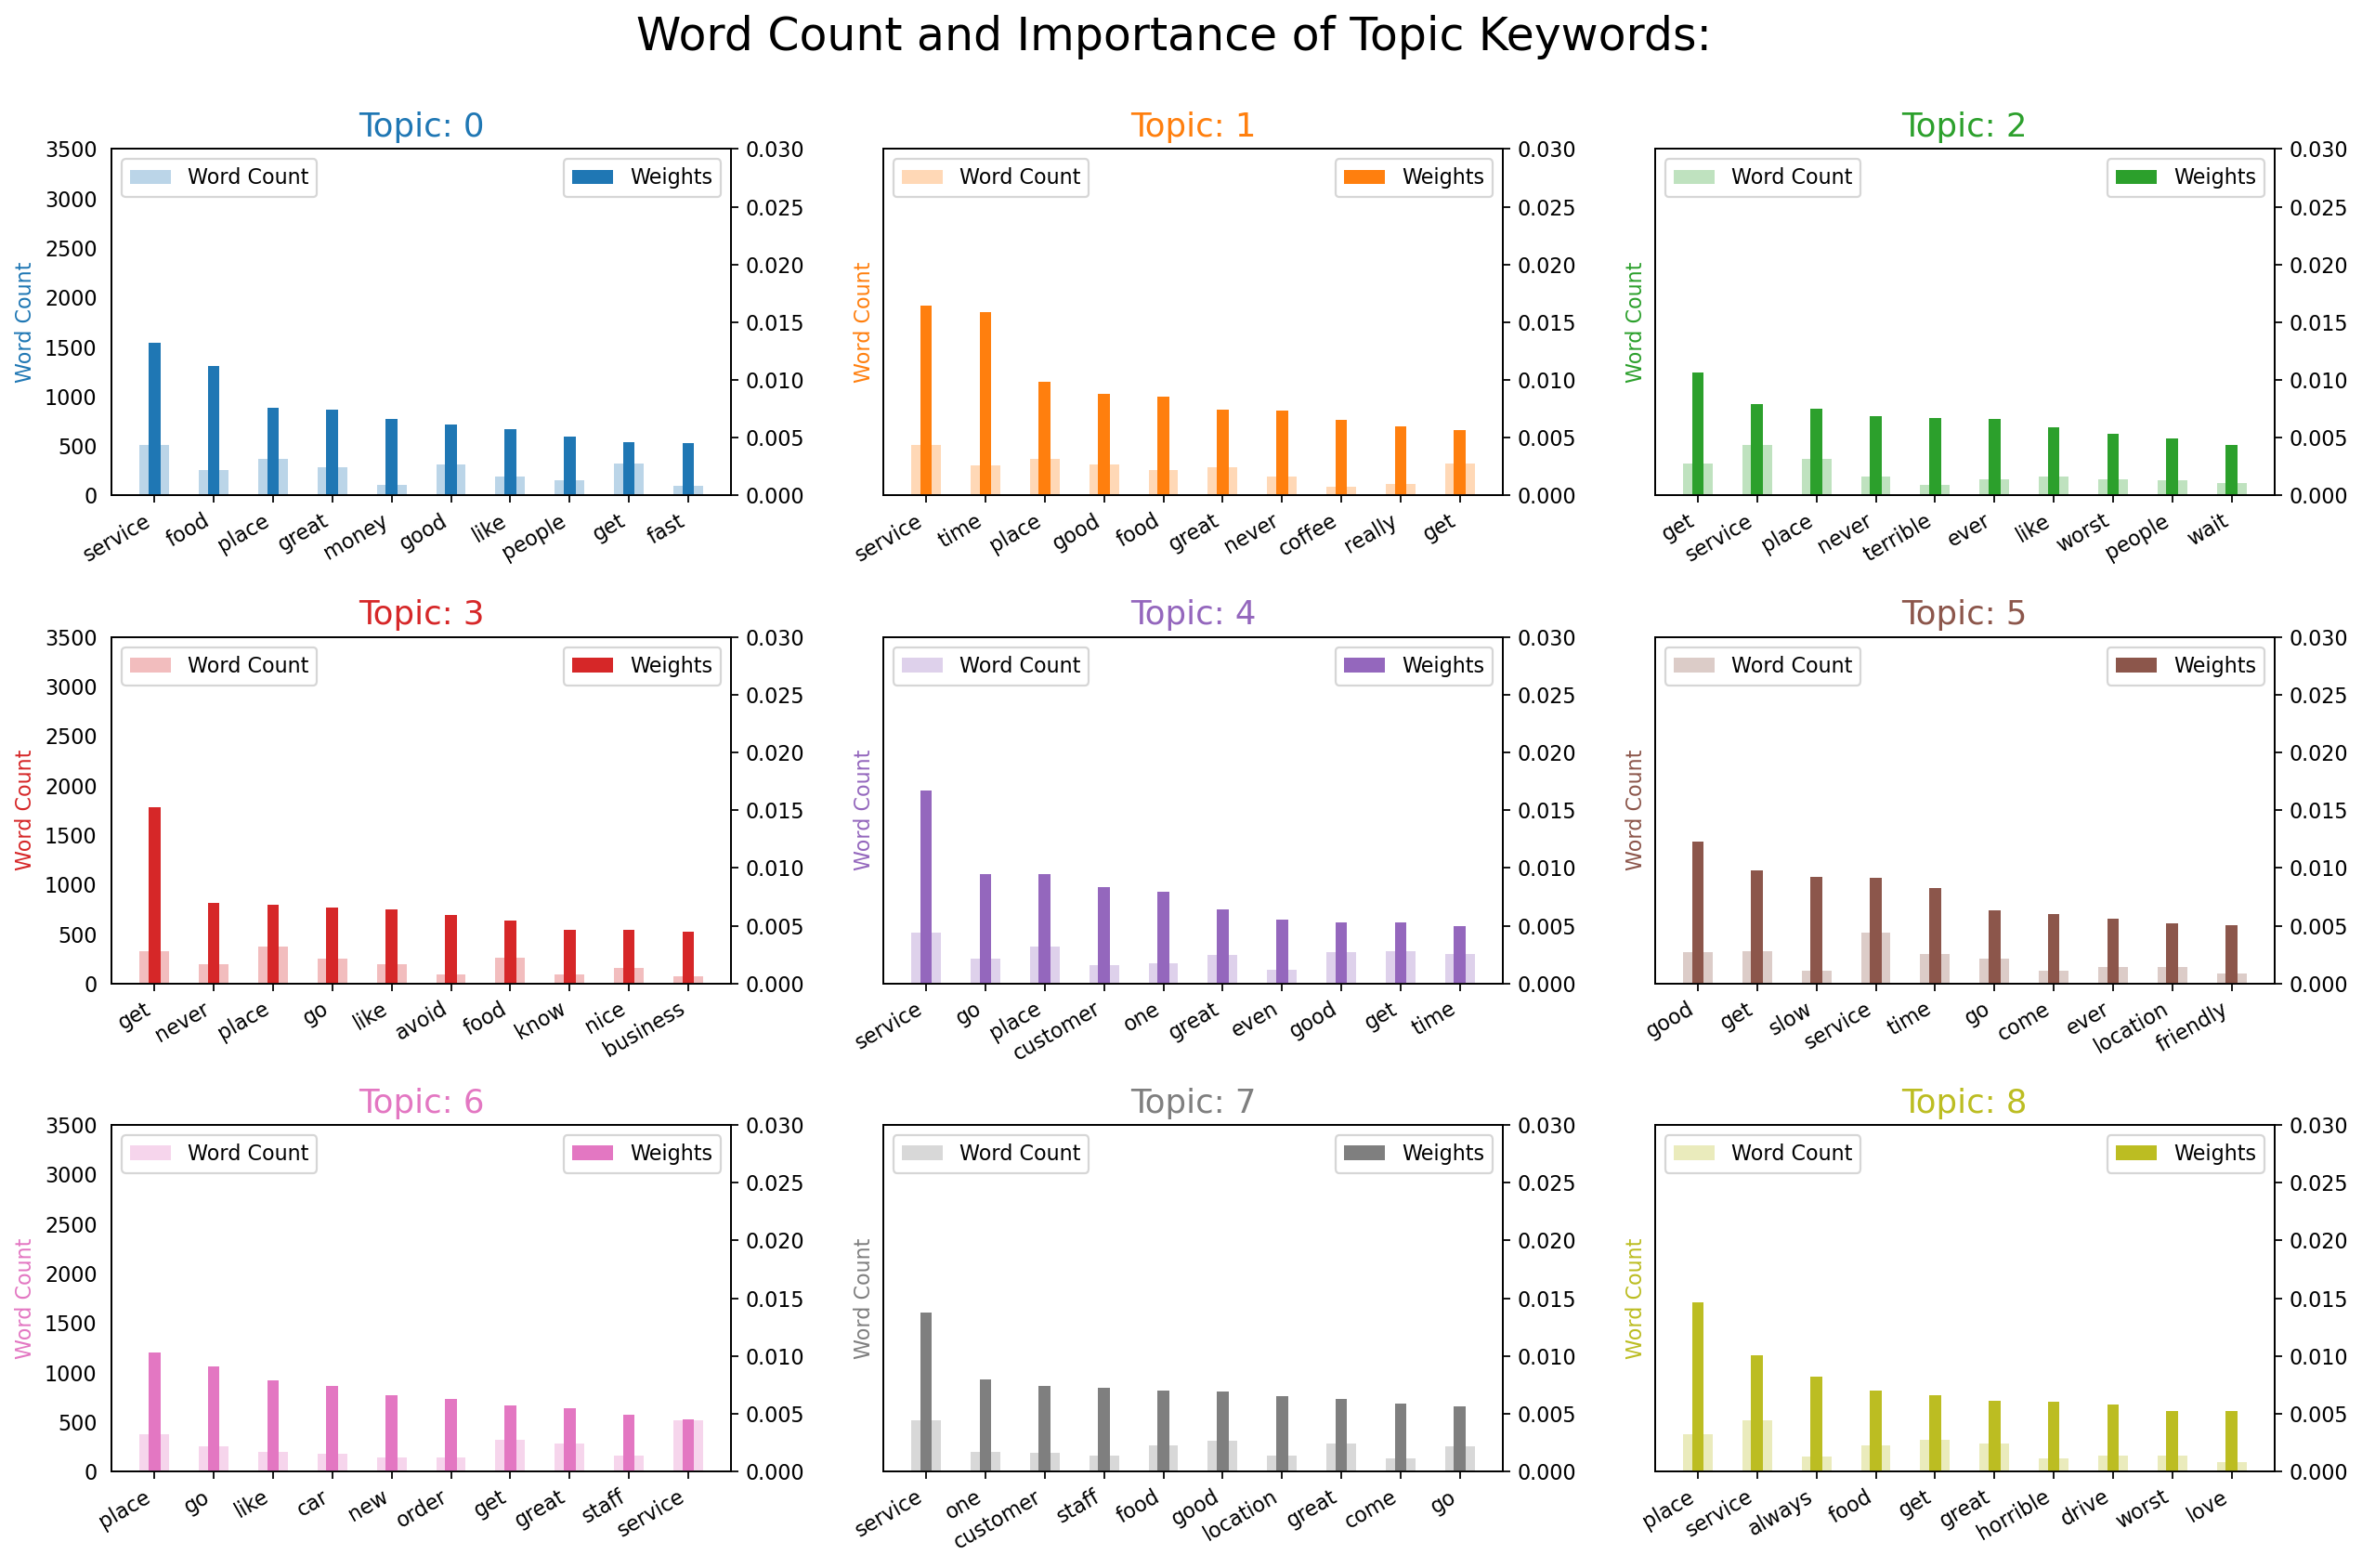

In [77]:
#Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 3, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df_2.loc[df_2.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df_2.loc[df_2.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df_2.loc[df_2.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords: ', fontsize=22, y=1.05)    
plt.show()

Based on this visualization we can see the most common words provided by the customers tips based on the topic that were assigned by the LDA algorithm. For instance in Topic 0 we see key words such as terrible, service, place. These are tips/comments givens by customers improve the the business. Comparing it to the 

# In conclusion:

Looking at the results given through the analysis done by comparing customer tips/comments given to the 5 stared rated business and 2 stared rated business in austin. We can see that 5 star rated business get more positive feedback in based on the service they provide to the customer, location of the business, pricing etc. The 2 star related business gets a mixture of negative and positve comments but more negative comments regarding there staff, service, time, etc. What the 2 star business can do to improve their quality of business is to take procaution and work on these complaints and comments left by the customers to improve customer experience, wait time, etc. This will most likely give them a boost in ratings and increase daily customer activities.  